In [2]:
import pandas as pd
import numpy as np

master_data = pd.read_csv('Labeled_data.csv')

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer


# Drop NaN values
master_data = master_data.dropna()

# Separate features and target
X = master_data.drop('Predicted_Label', axis=1)
y = master_data['Predicted_Label']

X_feature = X.columns
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define transformations
preprocessor = ColumnTransformer([
    ('cat', OrdinalEncoder(), categorical_cols),  # Encode categorical columns
    ('num', StandardScaler(), numeric_cols)      # Standardize numerical columns
])

# Transform features
X = preprocessor.fit_transform(X)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)


# Define the models and their parameter grids
param_grid_rf = {
        'n_estimators': [50],
        'max_depth': [5,10],
        'min_samples_leaf' :[10,15,20]
    }
param_grid_knn = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
    }

RF = RandomForestClassifier(random_state=42069)

Knn_C = KNeighborsClassifier()

grid_rf = GridSearchCV(RF,param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_KNN = GridSearchCV(Knn_C, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

grid_rf.fit(X_train,y_train)
grid_KNN.fit(X_train,y_train)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/jianderi/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>
    exitcode = process_obj._bootstrap()
  File "/home/jianderi/anaconda3/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/jianderi/anaconda3/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self.

KeyboardInterrupt: 

In [ ]:
print(grid_rf.best_estimator_)
print(grid_KNN.best_estimator_)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50,
                       random_state=42069)
KNeighborsClassifier(n_neighbors=3, weights='distance')


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     31535
           1       0.98      0.99      0.99     18449

    accuracy                           0.99     49984
   macro avg       0.99      0.99      0.99     49984
weighted avg       0.99      0.99      0.99     49984



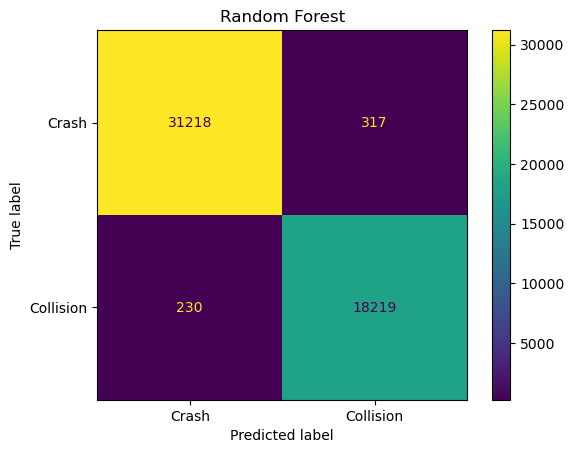

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     31535
           1       0.96      0.96      0.96     18449

    accuracy                           0.97     49984
   macro avg       0.97      0.97      0.97     49984
weighted avg       0.97      0.97      0.97     49984



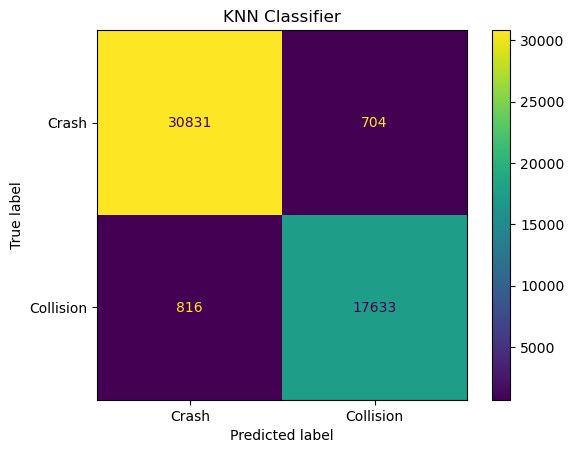

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf_rf = grid_rf.best_estimator_
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=clf_rf.classes_)

print(classification_report(y_test, y_pred_rf))

cm_disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Crash', 'Collision'])

cm_disp_rf.plot()
plt.title("Random Forest")
plt.show()

clf_KNN = grid_KNN.best_estimator_
clf_KNN.fit(X_train, y_train)

y_pred_KNN = clf_KNN.predict(X_test)


cm_KNN = confusion_matrix(y_test, y_pred_KNN, labels=clf_KNN.classes_)

print(classification_report(y_test, y_pred_KNN))

cm_disp_KNN = ConfusionMatrixDisplay(confusion_matrix=cm_KNN, display_labels=['Crash', 'Collision'])

cm_disp_KNN.plot()

plt.title("KNN Classifier")
plt.show()


              precision    recall  f1-score   support

           0       0.96      0.97      0.96     31535
           1       0.94      0.92      0.93     18449

    accuracy                           0.95     49984
   macro avg       0.95      0.94      0.95     49984
weighted avg       0.95      0.95      0.95     49984



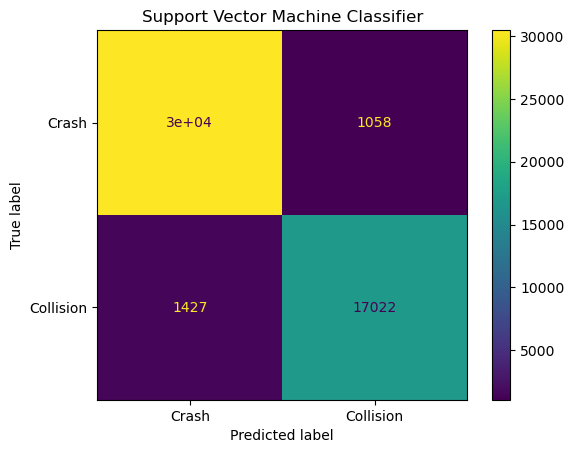

In [8]:
clf_svm = SVC(C=3, kernel='rbf', gamma=0.1)
clf_svm.fit(X_train,y_train)

y_pred_SVM = clf_svm.predict(X_test)

cm_SVM = confusion_matrix(y_test,y_pred_SVM, labels=clf_svm.classes_)

print(classification_report(y_true=y_test,y_pred=y_pred_SVM))

cm_disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_SVM, display_labels=['Crash', 'Collision'])

cm_disp_svm.plot()

plt.title("Support Vector Machine Classifier")
plt.show()

Text(0.5, 1.0, 'Out of Sample ROC/AUC')

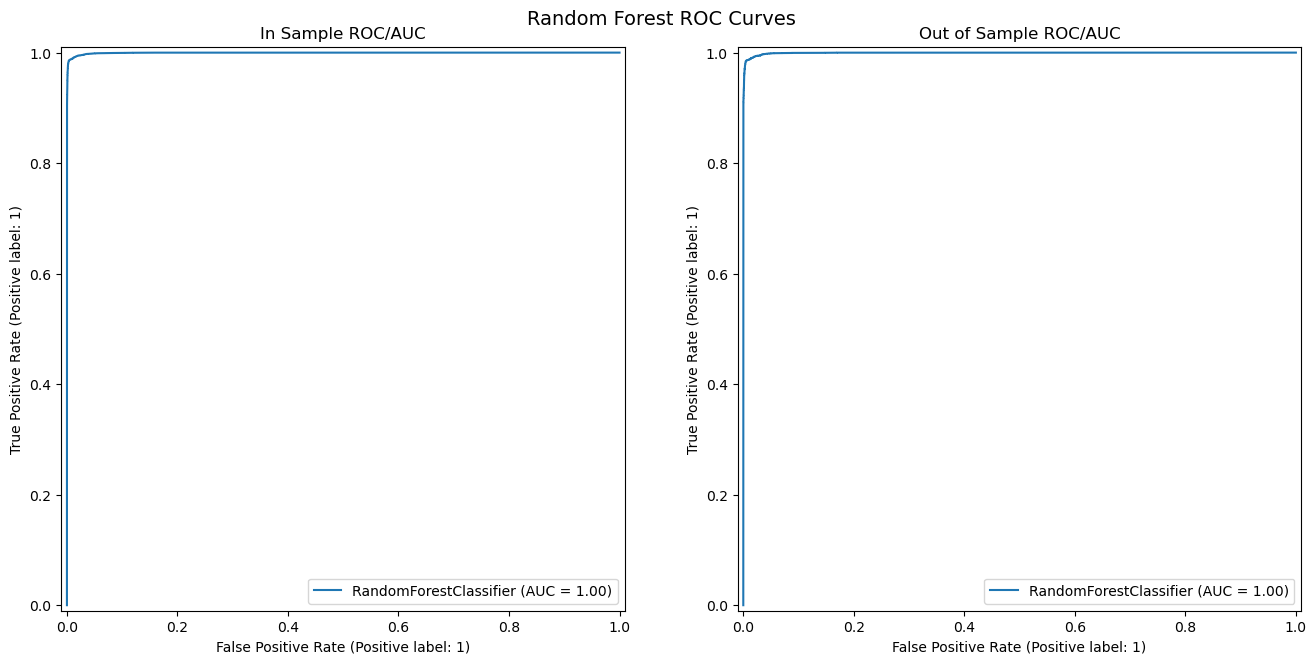

In [14]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(1,2,figsize=(16,9))
rf_in_sample = RocCurveDisplay.from_estimator(clf_rf, X_train, y_train,ax=ax[0])
rf_oos = RocCurveDisplay.from_estimator(clf_rf, X_test,y_test, ax=ax[1])
fig.suptitle("Random Forest ROC Curves", fontsize=14, y=0.85)
ax[0].set_title("In Sample ROC/AUC")
ax[1].set_title('Out of Sample ROC/AUC')



Text(0.5, 1.0, 'Out of Sample ROC/AUC')

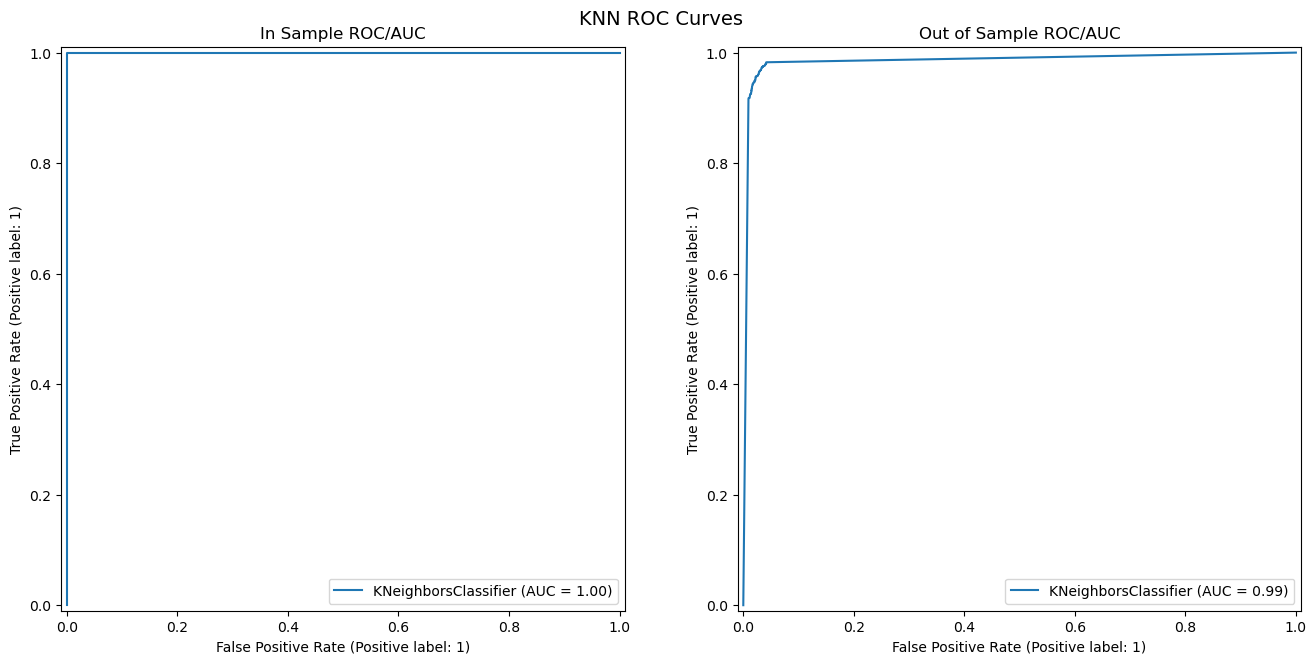

In [15]:
fig, ax = plt.subplots(1,2,figsize=(16,9))
KNN_in_sample = RocCurveDisplay.from_estimator(clf_KNN, X_train, y_train,ax=ax[0])
KNN_oos = RocCurveDisplay.from_estimator(clf_KNN, X_test,y_test, ax=ax[1])
fig.suptitle("KNN ROC Curves", fontsize=14, y=0.85)
ax[0].set_title("In Sample ROC/AUC")
ax[1].set_title('Out of Sample ROC/AUC')

Text(0.5, 1.0, 'Out of Sample ROC/AUC')

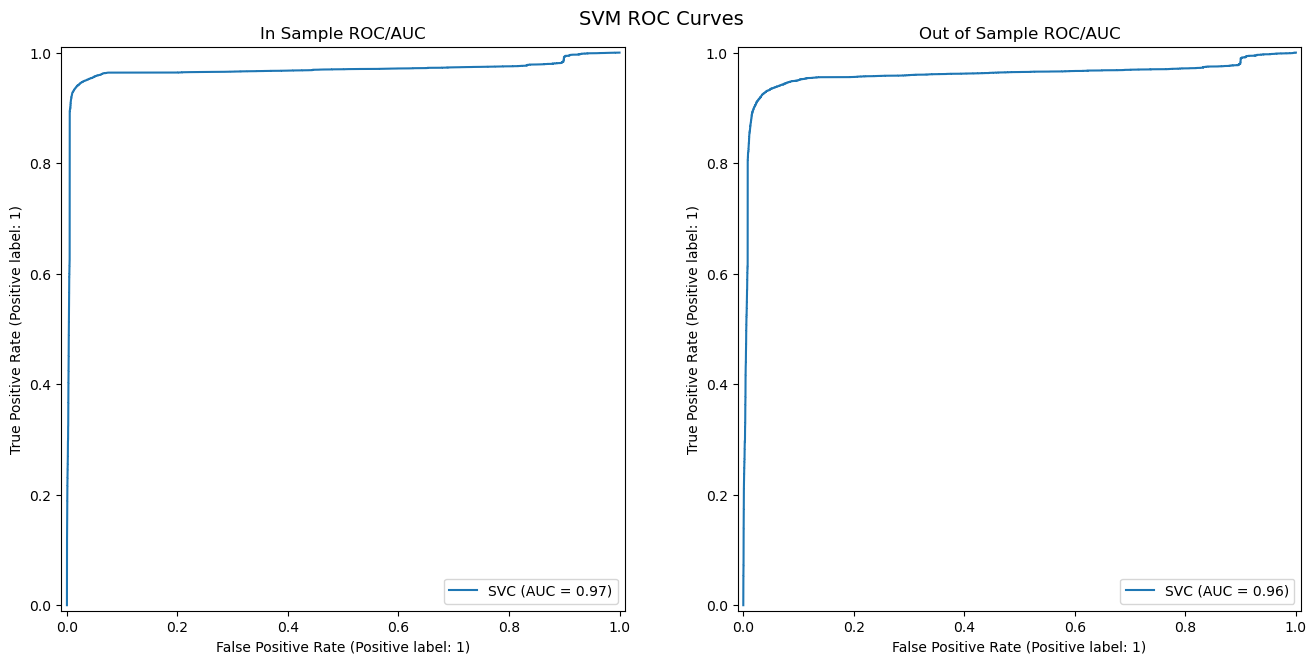

In [16]:
fig, ax = plt.subplots(1,2,figsize=(16,9))
SVM_in_sample = RocCurveDisplay.from_estimator(clf_svm, X_train, y_train,ax=ax[0])
SVM_oos = RocCurveDisplay.from_estimator(clf_svm, X_test,y_test, ax=ax[1])
fig.suptitle("SVM ROC Curves", fontsize=14, y=0.85)
ax[0].set_title("In Sample ROC/AUC")
ax[1].set_title('Out of Sample ROC/AUC')

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     31535
           1       0.95      0.95      0.95     18449

    accuracy                           0.96     49984
   macro avg       0.96      0.96      0.96     49984
weighted avg       0.96      0.96      0.96     49984



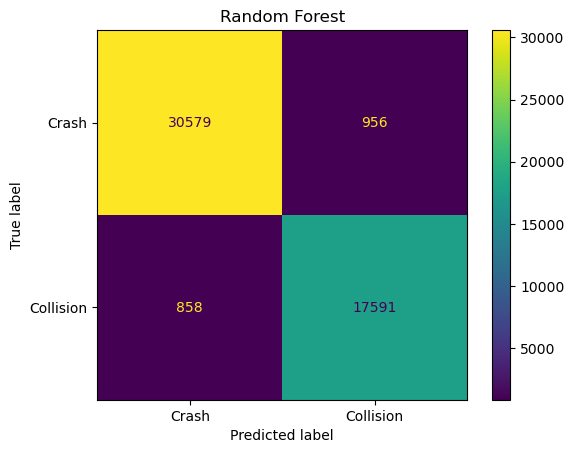

Text(0.5, 1.0, 'Out of Sample ROC/AUC')

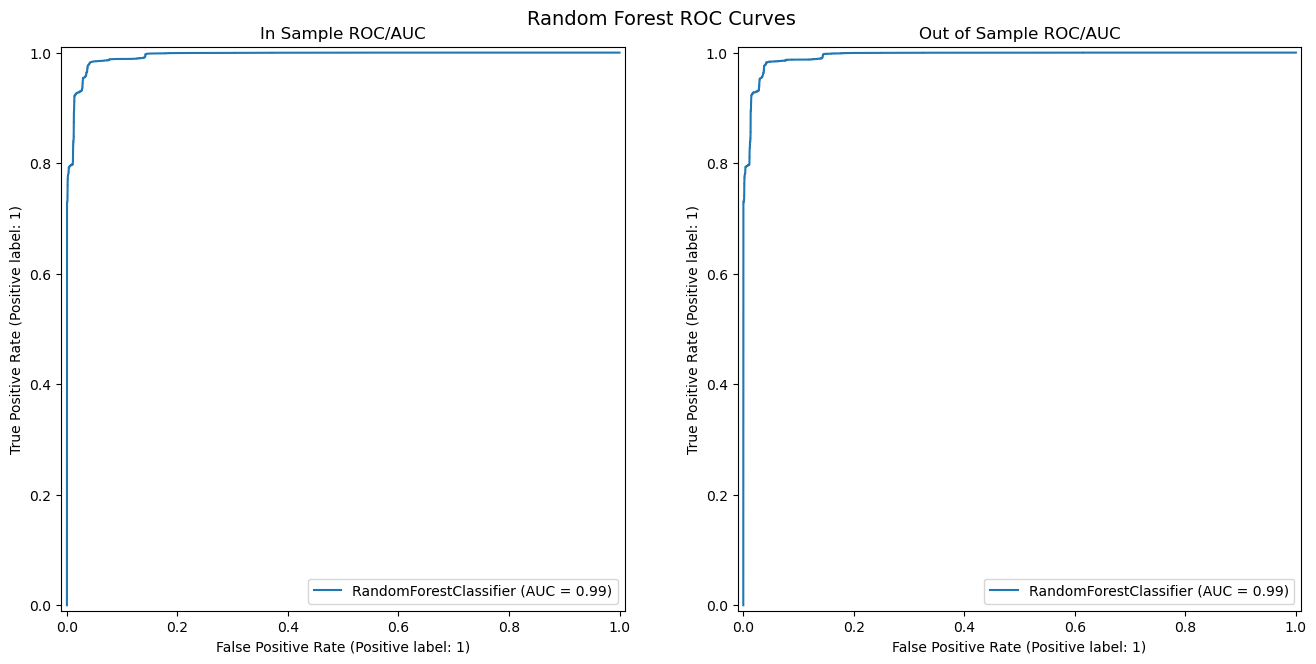

In [12]:
rf_new = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=50, min_samples_leaf=25)
rf_new.fit(X_train,y_train)

y_pred_rf = rf_new.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_new.classes_)

print(classification_report(y_test, y_pred_rf))

cm_disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Crash', 'Collision'])

cm_disp_rf.plot()
plt.title("Random Forest")
plt.show()

fig, ax = plt.subplots(1,2,figsize=(16,9))
rf_in_sample = RocCurveDisplay.from_estimator(rf_new, X_train, y_train,ax=ax[0])
rf_oos = RocCurveDisplay.from_estimator(rf_new, X_test,y_test, ax=ax[1])
fig.suptitle("Random Forest ROC Curves", fontsize=14, y=0.85)
ax[0].set_title("In Sample ROC/AUC")
ax[1].set_title('Out of Sample ROC/AUC')

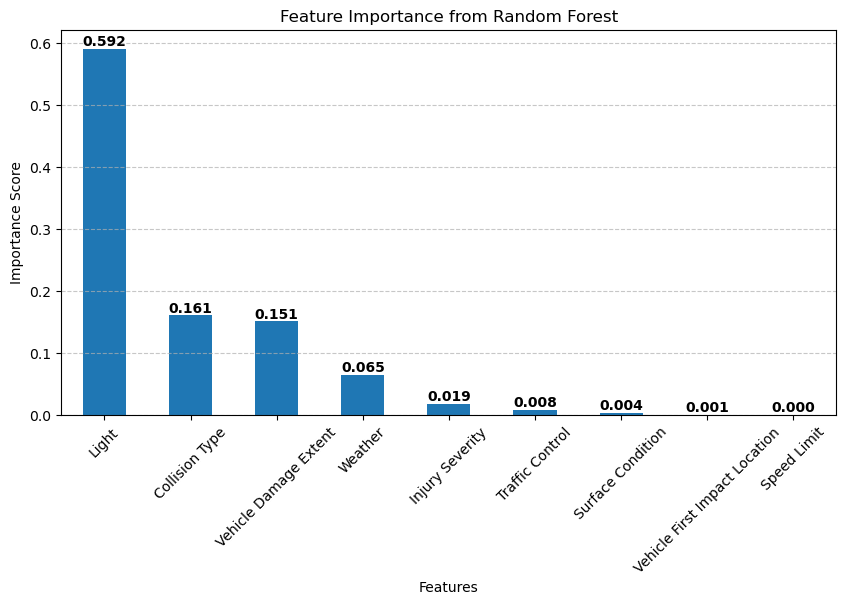

In [21]:
import matplotlib.pyplot as plt
# Get feature importance
importances = clf_rf.feature_importances_

importance_df = pd.DataFrame({'Feature': X_feature, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create the plot
ax = importance_df.set_index("Feature").plot(kind="bar", figsize=(10, 5), legend=False)

# Add value labels on top of bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
        bar.get_height(),  # Y-coordinate (height of bar)
        f"{bar.get_height():.3f}",  # Value formatted to 3 decimal places
        ha="center",  # Align horizontally at center
        va="bottom",  # Align text at bottom of value
        fontsize=10, 
        fontweight="bold"
    )

# Customize the plot
plt.title("Feature Importance from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer


# Drop NaN values
master_data = master_data.dropna()

# Separate features and target
X = master_data.drop('Predicted_Label', axis=1)
y = master_data['Predicted_Label']

# Split into training and test sets FIRST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Identify categorical and numerical columns (using X_train to avoid test-set influence)
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Define transformations
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# Fit preprocessor on training data and transform both train/test sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Get feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Encode target variable (fit on training data only)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


              precision    recall  f1-score   support

           0       0.97      0.96      0.96     21024
           1       0.94      0.94      0.94     12299

    accuracy                           0.96     33323
   macro avg       0.95      0.95      0.95     33323
weighted avg       0.96      0.96      0.96     33323



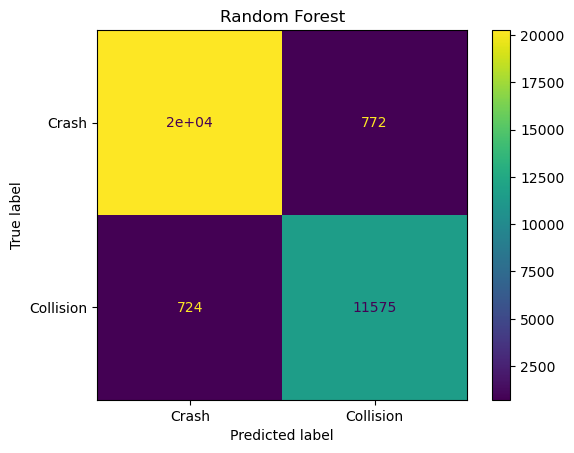

In [62]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf_dummy_rf = grid_rf.best_estimator_
clf_dummy_rf.fit(X_train_transformed, y_train_encoded)

y_pred_rf = clf_dummy_rf.predict(X_test_transformed)

cm_rf = confusion_matrix(y_test_encoded, y_pred_rf, labels=clf_dummy_rf.classes_)

print(classification_report(y_test_encoded, y_pred_rf))

cm_disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Crash', 'Collision'])

cm_disp_rf.plot()
plt.title("Random Forest")
plt.show()

                                         Feature  Importance
93           cat__Traffic Control_TRAFFIC SIGNAL    0.250207
76              cat__Traffic Control_NO CONTROLS    0.146237
138                             num__Speed Limit    0.085563
94                  cat__Traffic Control_UNKNOWN    0.077163
91                cat__Traffic Control_STOP SIGN    0.076036
42                          cat__Weather_RAINING    0.063806
50                    cat__Surface Condition_DRY    0.046560
92   cat__Traffic Control_TRAFFIC CONTROL SIGNAL    0.043628
59                    cat__Surface Condition_WET    0.037046
35                            cat__Weather_CLEAR    0.033484


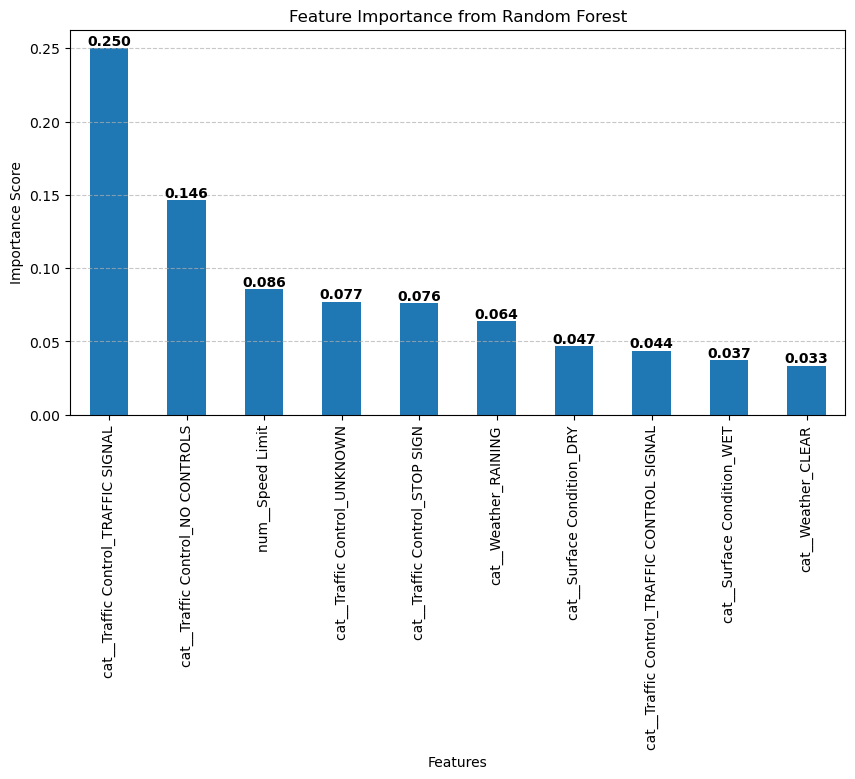

In [ ]:
import matplotlib.pyplot as plt
# Get feature importance
importances = clf_dummy_rf.feature_importances_

# Create a DataFrame to visualize importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Create the plot
ax = feature_importance.set_index("Feature").head(10).plot(kind="bar", figsize=(10, 5), legend=False)

# Add value labels on top of bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),  
        f"{bar.get_height():.3f}",  
        ha="center", 
        va="bottom", 
        fontsize=10, 
        fontweight="bold"
    )

# Customize the plot
plt.title("Feature Importance from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=90)  
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [ ]:
X_feature = pd.DataFrame(X,columns=)

In [44]:
X_feature

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.579372
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.633184
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.579372
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.633184
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.026906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166607,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.185650
166608,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026906
166609,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.579372
166610,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.185650


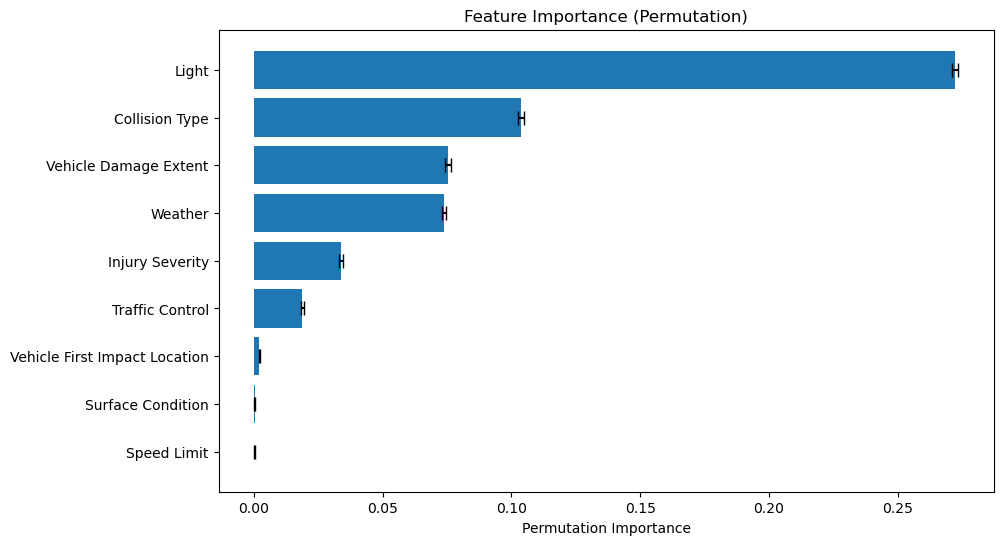

In [20]:
# Sort features by importance
sorted_idx = result.importances_mean.argsort()[::-1]  # Descending order

# Create a DataFrame for plotting
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': X_feature[sorted_idx],
    'Importance': result.importances_mean[sorted_idx],
    'Std': result.importances_std[sorted_idx]
})

# Plot
plt.figure(figsize=(10, 6))
plt.barh(
    importance_df['Feature'], 
    importance_df['Importance'], 
    xerr=importance_df['Std'], 
    capsize=5
)
plt.gca().invert_yaxis()  # Most important feature at the top
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()